## **Fig3c,e** ##

In [12]:
# 2025.09.19 Show mean FIM along rc

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

(ymin,ymax)=(-8,0)
# data_name = 'DG_bin_ppt'
# data_name = 'EG_ab_beta'
# data_name = 'EG_beta'
# data_name = 'EG_ab_beta'
data_name = 'zebrafish_dynamo_part_P2M'
result_path = 'FI_distribution_rc/'+data_name+'/'

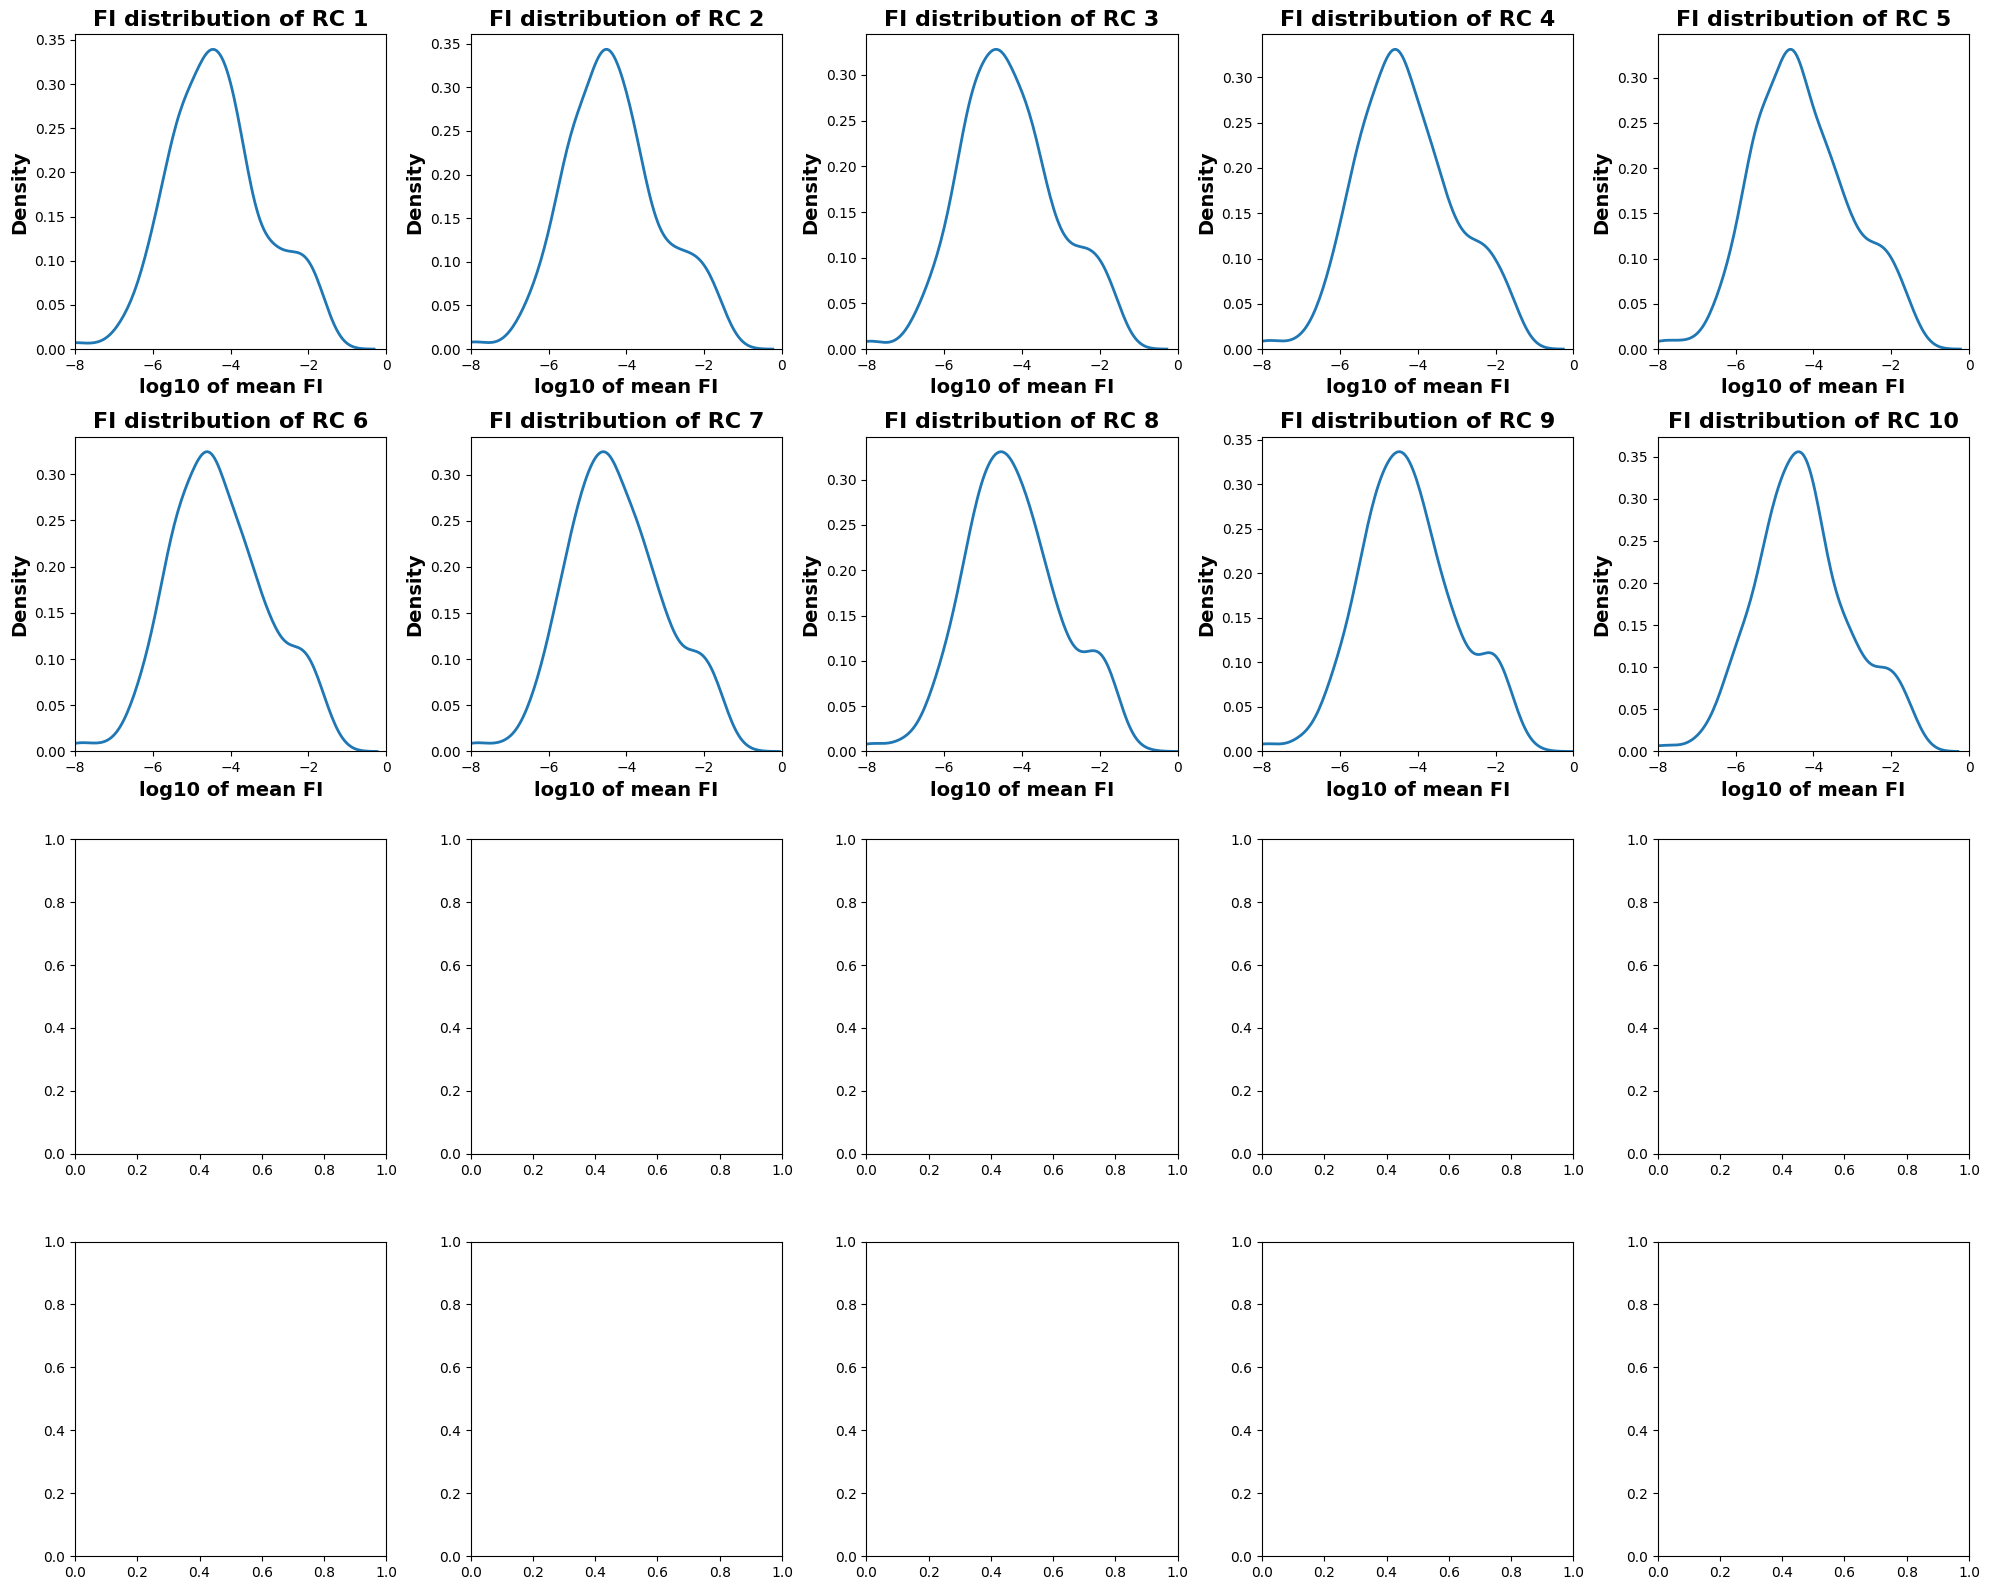

In [13]:
# 迭代绘图
# 创建 4x5 的子图结构
fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # 创建 4x5 网格，并调整大小
mean_FIMs = np.load(result_path+'mean_FIMs.npy')
for k in range(len(mean_FIMs)):
    mean_FIM = mean_FIMs[k]

    ax = axs[k // 5, k % 5]  # 找到正确的子图位置
    # ax.hist(np.log10(np.diag(mean_FIM)), bins=100, alpha=0.5, edgecolor='black', label='Frequency Histogram')
    sns.kdeplot(np.log10(np.diag(mean_FIM)), ax=ax, lw=2, label='KDE Curve')
    ax.set_xlim(ymin,ymax)
    # ax.set_xlim(-8,0)
    # ax.set_xlim(-7,-1)
    # ax.set_ylim(0,25)
    # 添加标题和标签
    ax.set_title(f'FI distribution of RC {k+1}', fontsize=16, weight='bold')
    ax.set_xlabel('log10 of mean FI', fontsize=14, weight='bold')
    ax.set_ylabel('Density', fontsize=14, weight='bold')
# 调整整体布局和显示
plt.tight_layout()
plt.savefig(result_path+'Fisher distribution rc2.png')
plt.show()

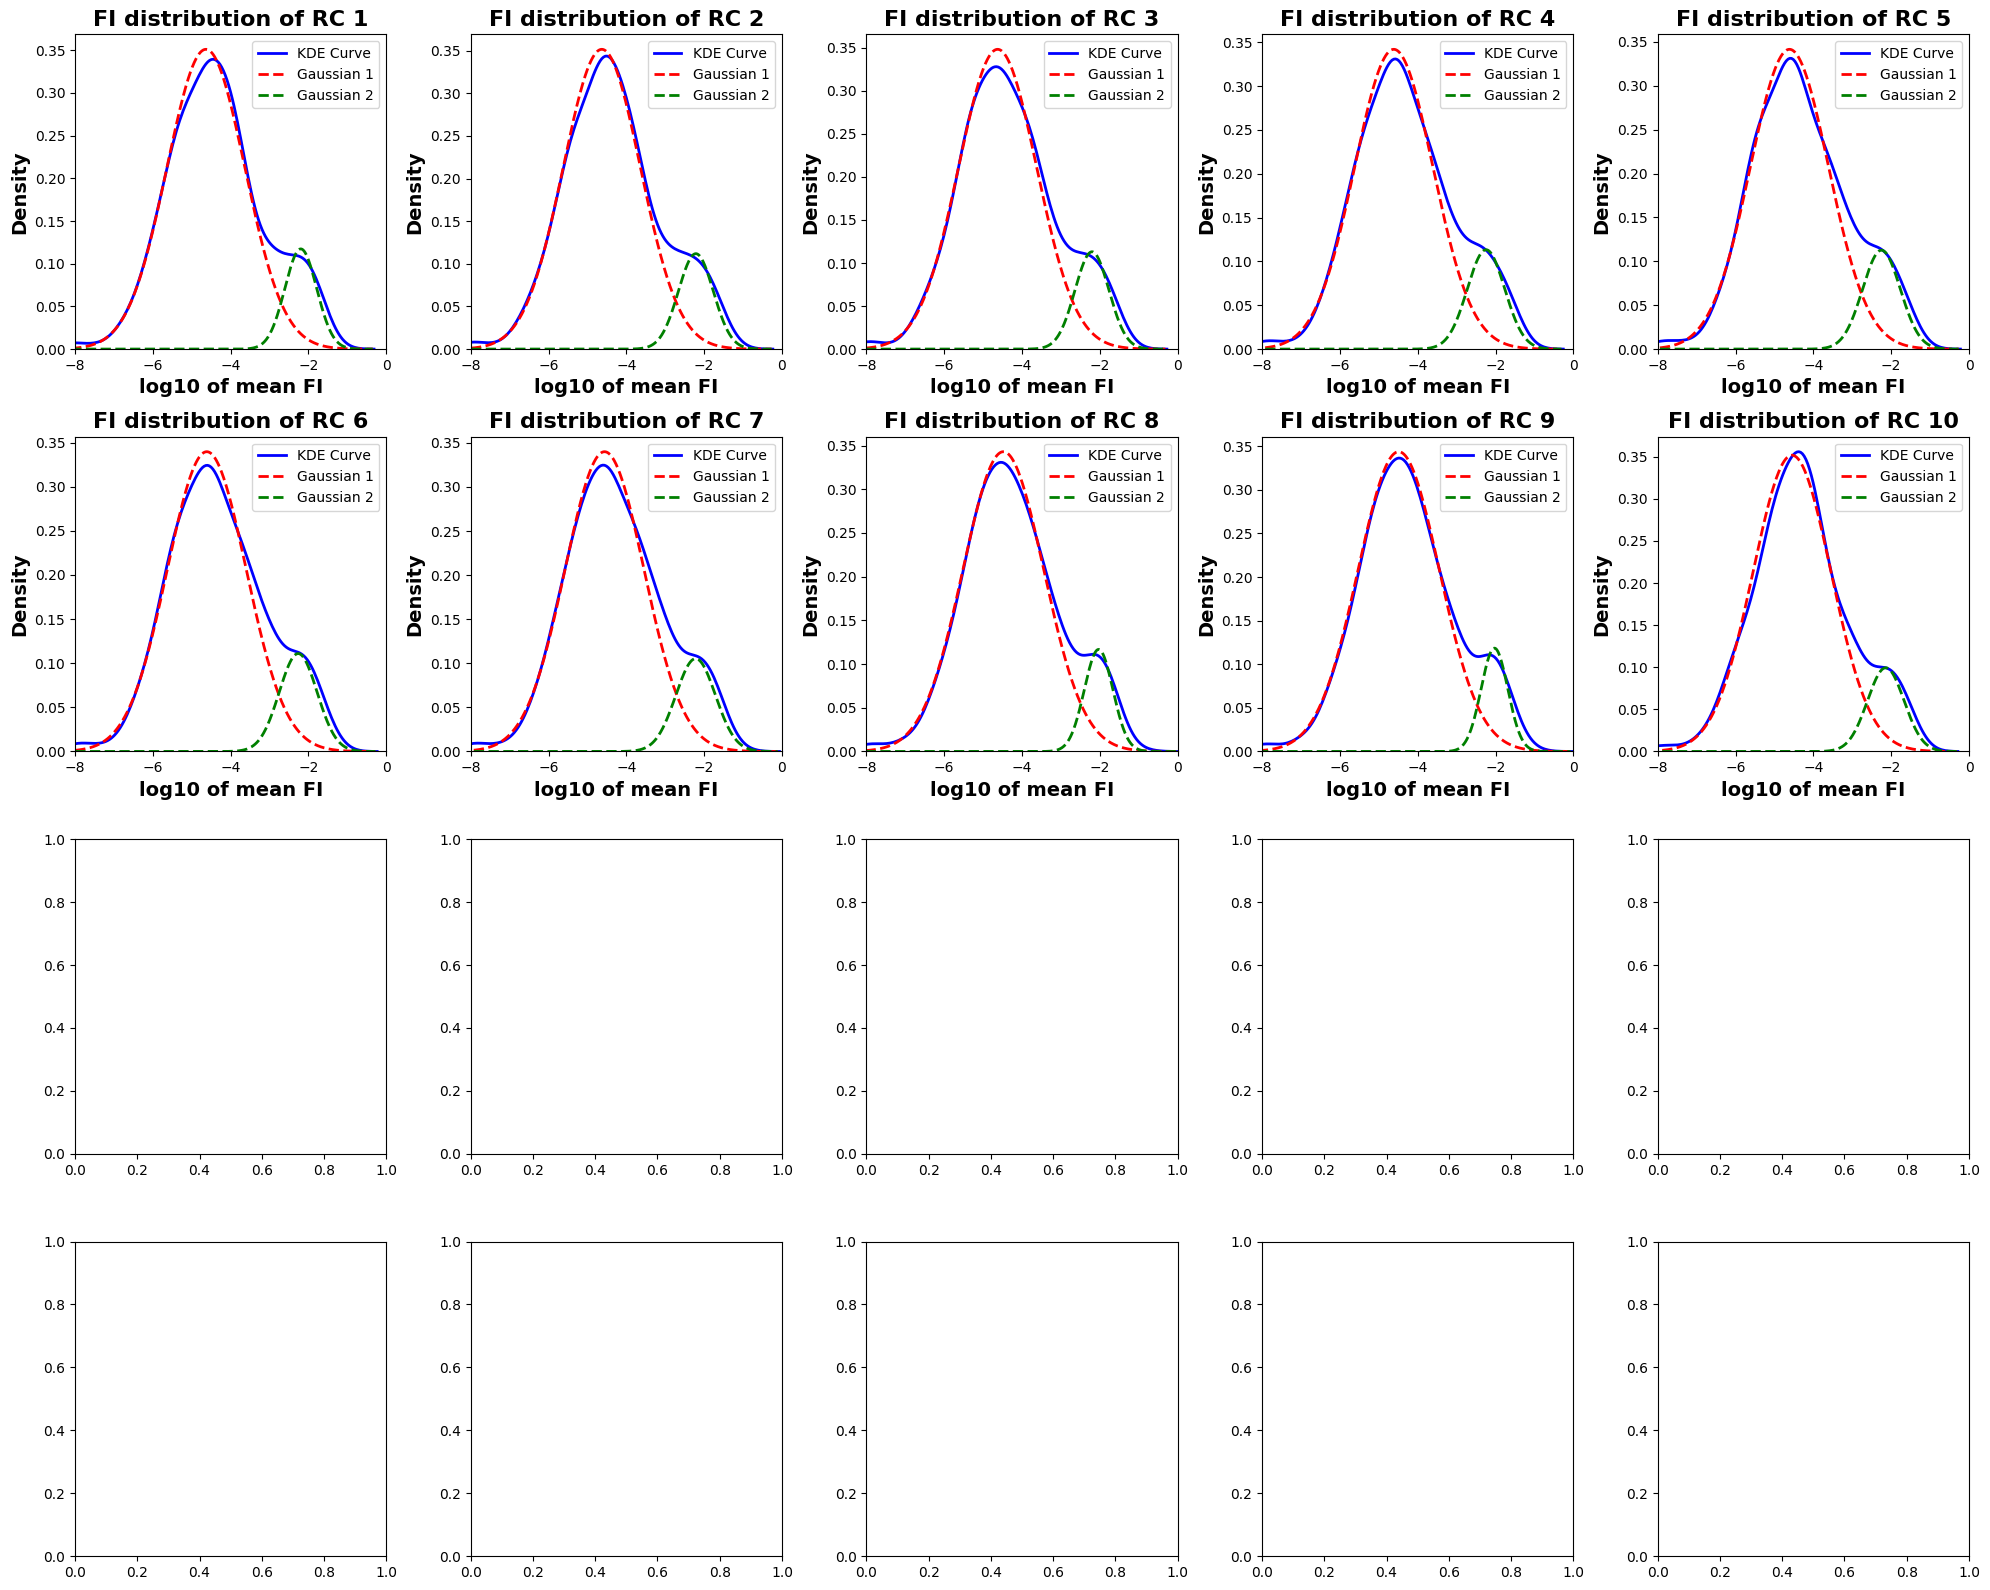

In [14]:
# +++ GMM 
fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # 创建 4x5 网格，并调整大小
for k in range(len(mean_FIMs)): 
    mean_FIM = mean_FIMs[k]
  
    ax = axs[k // 5, k % 5]  # 找到正确的子图位置
    data = np.log10(np.diag(mean_FIM))  # 取对角元素做 log10 转换
    
    # 绘制 KDE 曲线
    sns.kdeplot(data, ax=ax, lw=2, label='KDE Curve', color='blue')

    # 双高斯混合模型拟合
    gmm = GaussianMixture(n_components=2, random_state=42, means_init=np.array([[-6],[0]]))
    gmm.fit(data.reshape(-1, 1))
    
    # 提取拟合参数
    means = gmm.means_.flatten()  # 高斯均值
    stds = np.sqrt(gmm.covariances_.flatten())  # 高斯标准差
    weights = gmm.weights_  # 高斯权重

    # 生成 X 轴范围
    x = np.linspace(data.min() - 1, data.max() + 1, 1000)
    y_gmm = np.zeros_like(x)

    # 绘制两个高斯分布
    colors = ['red', 'green']
    for i in range(2):
        y_gaussian = weights[i] * norm.pdf(x, loc=means[i], scale=stds[i])
        ax.plot(x, y_gaussian, '--', lw=2, label=f'Gaussian {i+1}', color=colors[i])
        y_gmm += y_gaussian

    # 绘制混合高斯总分布
    # ax.plot(x, y_gmm, '-', lw=2, label='Gaussian Mixture', color='purple')

    # 设置子图范围
    ax.set_xlim(ymin,ymax)
    # ax.set_xlim(-8,0)
    # ax.set_xlim(-7,-1)

    # 添加标题和标签
    ax.set_title(f'FI distribution of RC {k+1}', fontsize=16, weight='bold')
    ax.set_xlabel('log10 of mean FI', fontsize=14, weight='bold')
    ax.set_ylabel('Density', fontsize=14, weight='bold')

    # 添加图例
    ax.legend()

# 调整整体布局和显示
plt.tight_layout()
plt.savefig(result_path+'GMM distribution rc.png')
plt.show()

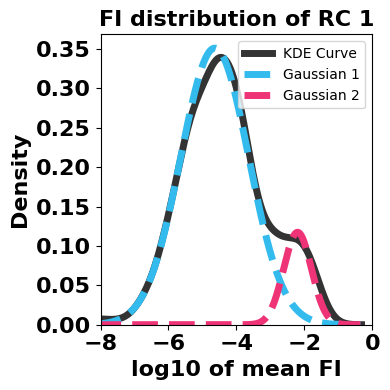

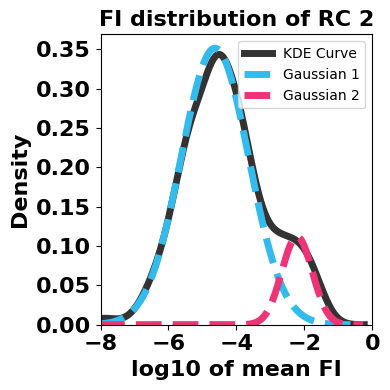

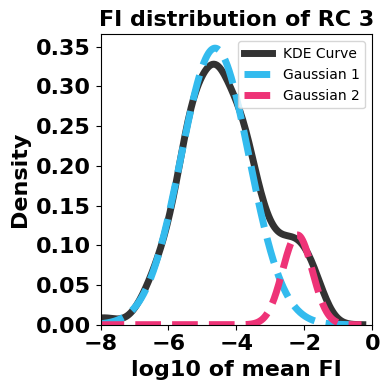

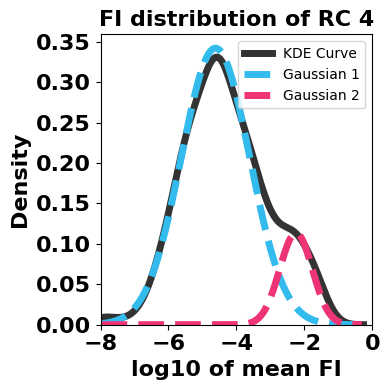

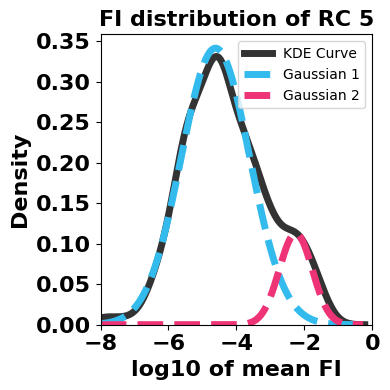

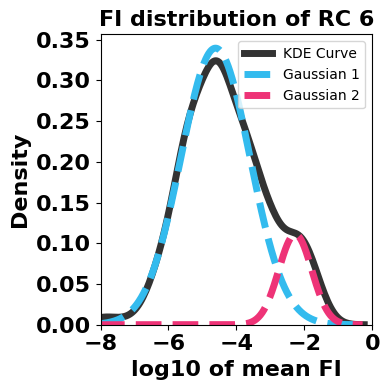

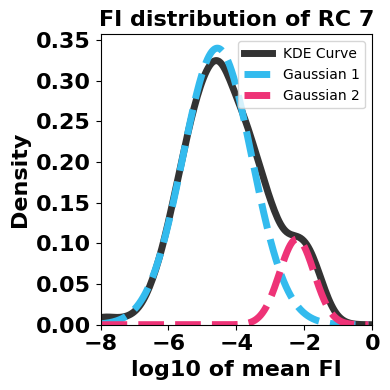

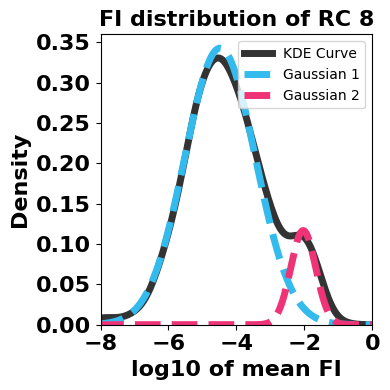

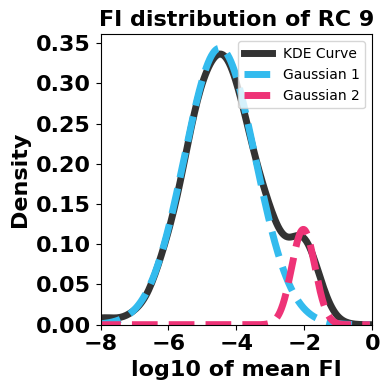

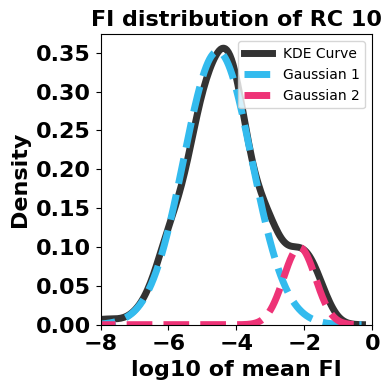

In [15]:
for k in range(len(mean_FIMs)): 
    plt.figure(figsize=(4,4))
    mean_FIM = mean_FIMs[k]
    data = np.log10(np.diag(mean_FIM))  # 取对角元素做 log10 转换
    
    # 绘制 KDE 曲线
    sns.kdeplot(data, lw=5, label='KDE Curve', color='#333333')

    # 双高斯混合模型拟合
    gmm = GaussianMixture(n_components=2, random_state=42, means_init=np.array([[-6],[0]]))
    gmm.fit(data.reshape(-1, 1))
    
    # 提取拟合参数
    means = gmm.means_.flatten()  # 高斯均值
    stds = np.sqrt(gmm.covariances_.flatten())  # 高斯标准差
    weights = gmm.weights_  # 高斯权重

    # 生成 X 轴范围
    x = np.linspace(data.min() - 1, data.max() + 1, 1000)
    y_gmm = np.zeros_like(x)

    # 绘制两个高斯分布
    colors = ['#33BBEE', '#EE3377']
    for i in range(2):
        y_gaussian = weights[i] * norm.pdf(x, loc=means[i], scale=stds[i])
        plt.plot(x, y_gaussian, '--', lw=5, label=f'Gaussian {i+1}', color=colors[i])
        y_gmm += y_gaussian

    # 绘制混合高斯总分布
    # ax.plot(x, y_gmm, '-', lw=2, label='Gaussian Mixture', color='purple')

    # 设置子图范围
    plt.xlim(ymin,ymax)
    # ax.set_xlim(-8,0)
    # ax.set_xlim(-7,-1)

    # 添加标题和标签
    plt.title(f'FI distribution of RC {k+1}', fontsize=16, weight='bold')
    plt.xlabel('log10 of mean FI', fontsize=16, weight='bold')
    plt.ylabel('Density', fontsize=16, weight='bold')
    plt.xticks(fontsize=16, fontweight='bold')
    plt.yticks(fontsize=16, fontweight='bold')

    # 添加图例
    plt.legend()

    # 调整整体布局和显示
    plt.tight_layout()
    plt.savefig(result_path+f'GMM distribution rc{k+1}.png')
    plt.show()

In [16]:
# # 迭代绘图
# # 创建 4x5 的子图结构
# fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # 创建 4x5 网格，并调整大小
# mean_FIMs = np.load(result_path+'mean_FIMs_mean_cell.npy')
# for k in range(len(mean_FIMs)):
#     mean_FIM = mean_FIMs[k]

#     ax = axs[k // 5, k % 5]  # 找到正确的子图位置
#     # ax.hist(np.log10(np.diag(mean_FIM)), bins=100, alpha=0.5, edgecolor='black', label='Frequency Histogram')
#     sns.kdeplot(np.log10(np.diag(mean_FIM)), ax=ax, lw=2, label='KDE Curve')
#     ax.set_xlim(-7,-1)
#     # ax.set_xlim(-7,0)
#     # ax.set_xlim(-8,0)
#     # ax.set_ylim(0,25)
#     # 添加标题和标签
#     ax.set_title(f'FI distribution of RC {k+1}', fontsize=16, weight='bold')
#     ax.set_xlabel('log10 of mean FI', fontsize=14, weight='bold')
#     ax.set_ylabel('Density', fontsize=14, weight='bold')
# # 调整整体布局和显示

# plt.tight_layout()
# plt.savefig(result_path+'mean cell Fisher distribution rc2.png')
# plt.show()

In [17]:
# +++ GMM 
# fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # 创建 4x5 网格，并调整大小
# for k in range(len(mean_FIMs)): 
#     mean_FIM = mean_FIMs[k]
  
#     ax = axs[k // 5, k % 5]  # 找到正确的子图位置
#     data = np.log10(np.diag(mean_FIM))  # 取对角元素做 log10 转换
    
#     # 绘制 KDE 曲线
#     sns.kdeplot(data, ax=ax, lw=2, label='KDE Curve', color='blue')

#     # 双高斯混合模型拟合
#     gmm = GaussianMixture(n_components=2, random_state=42, means_init=np.array([[-6],[0]]))
#     gmm.fit(data.reshape(-1, 1))
    
#     # 提取拟合参数
#     means = gmm.means_.flatten()  # 高斯均值
#     stds = np.sqrt(gmm.covariances_.flatten())  # 高斯标准差
#     weights = gmm.weights_  # 高斯权重

#     # 生成 X 轴范围
#     x = np.linspace(data.min() - 1, data.max() + 1, 1000)
#     y_gmm = np.zeros_like(x)

#     # 绘制两个高斯分布
#     colors = ['red', 'green']
#     for i in range(2):
#         y_gaussian = weights[i] * norm.pdf(x, loc=means[i], scale=stds[i])
#         ax.plot(x, y_gaussian, '--', lw=2, label=f'Gaussian {i+1}', color=colors[i])
#         y_gmm += y_gaussian

#     # 绘制混合高斯总分布
#     # ax.plot(x, y_gmm, '-', lw=2, label='Gaussian Mixture', color='purple')

#     # 设置子图范围
#     ax.set_xlim(-7,-1)
#     # ax.set_xlim(-7,0)
#     # ax.set_xlim(-8,0)

#     # 添加标题和标签
#     ax.set_title(f'FI distribution of RC {k+1}', fontsize=16, weight='bold')
#     ax.set_xlabel('log10 of mean FI', fontsize=14, weight='bold')
#     ax.set_ylabel('Density', fontsize=14, weight='bold')

#     # 添加图例
#     ax.legend()

# # 调整整体布局和显示
# plt.tight_layout()
# plt.savefig(result_path+'mean cell GMM distribution rc.png')
# plt.show()

In [18]:
# def find_nearest_indices_voronoi(path0, dim_n, n_nei):
#     cells_2d = adata.obsm[f'X_pca'][:, :dim_n]  # [N_cells, 2]
#     path_2d = path0[:, :dim_n]                 # [N_rc_points, 2]
#     dist_matrix = distance.cdist(cells_2d, path_2d)  # [N_cells, N_rc_points]
#     closest_rc = np.argmin(dist_matrix, axis=1)      # 每个细胞对应的RC索引
#     cells_in_voronoi = {} # cells_in_voronoi里存的是每个细胞归属于哪一个vosinoi格子。
#     for rc_i in range(path_2d.shape[0]):
#         idx_in_cell = np.where(closest_rc == rc_i)[0]
#         cells_in_voronoi[rc_i] = idx_in_cell
#     nearest_30_cells = []  # nearest_30_cells里存的是筛选到的对应每个RC紧挨着的30个细胞。
#     nearest_cell = []
#     for rc_i in range(path_2d.shape[0]):
#         idx_in_cell = cells_in_voronoi[rc_i]
#         if len(idx_in_cell) == 0:
#             nearest_30_cells[rc_i] = np.array([])
#             nearest_cell[rc_i] = np.array([])
#             continue
#         dist_to_rc = dist_matrix[idx_in_cell, rc_i]
#         nearest_30_cells.append(idx_in_cell[np.argsort(dist_to_rc)[:n_nei]])
#         nearest_cell.append(idx_in_cell[np.argsort(dist_to_rc)[0]])
#     return nearest_30_cells, nearest_cell